In [448]:
import pandas as pd
pd.set_option('display.max_rows', 500)
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns

In [191]:
from sklearn.metrics import precision_recall_fscore_support,f1_score
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.model_selection import GridSearchCV

In [40]:
os.listdir()

['.ipynb_checkpoints',
 'ans_companyid_mapping_with_label.csv',
 'diff_ansid.csv',
 'innovationBaseInfo.json',
 'innovationCertificate.json',
 'innovationCompanies1.json',
 'innovationCompanies_update_deliveryType.json',
 'innovationCopyRegs.json',
 'innovationFunding.json',
 'innovationFunding1.json',
 'innovationTeamMember.json',
 'innovationTrademark.json',
 'sample_diff_ansid.xlsx',
 'sample_v6_normalized.csv',
 'Untitled.ipynb',
 'v2_20210302_sse_company_patent_indicators.csv',
 'v2_20210318_sse_company_nonpatent_indicators.csv',
 'woe_v3.pkl']

In [3]:
sample = pd.read_csv('sample_v6_normalized.csv',index_col='company_id')

In [4]:
# ic1 = pd.read_json('innovationCompanies1.json',lines=True)

# ic2 = pd.read_json('innovationCompanies_update_deliveryType.json',lines=True)

# ic2.set_index('company_id',inplace=True)
# ic1.set_index('company_id',inplace=True)

# ic12 = ic2[['ans_id','company_name']].join(ic1[['ans_id','company_name']],lsuffix='_2', rsuffix='_1',how='outer')

# ic12 = ic12.join(sample)

# ic12_diff = ic12.fillna('').query('ans_id_1!=ans_id_2')

# display(ic12_diff,ic12_diff.shape)

In [99]:
ic12['ans_id_in_pi'] = ic12.ans_id_2.isin(set(pi.ans_id))

In [111]:
ic12['company_name_in_pi'] = ic12.company_name_2.str.replace('（|）','').isin(pi.name.str.replace('（|）',''))

D:\Program Files\Miniconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  """Entry point for launching an IPython kernel.


In [ ]:
## 共计30家企业,company.json中有ansid,patent没找到对应ans_Id,
## 其中正例20个，负例10个
## 共计66家企业,comaany.json中没有ans_id

In [116]:
ic12.query('ans_id_in_pi==0 and company_name_in_pi==0').ans_id_2.value_counts(dropna=False)

NaN                                     66
f9ab28e2-c331-424c-acd4-9fe9196fb9a4     1
2a414d81-6e69-4223-9cf2-5d6cab2dd52e     1
67c8e0e5-4559-4b7c-9f1b-e4ce51952844     1
52ec71ee-3284-42cc-867a-b5bbc8e0d9ed     1
3e9736e5-af95-49a5-ba50-5e0182c97644     1
c00c9f6b-9696-434e-ab65-3ce3041d4630     1
70cbcd77-09e9-48ef-8d5d-a16554658476     1
c40ac2ea-c7f5-4cb1-bd2b-d12e05fe0f00     1
bfb0d8c8-ce3d-4491-aa7f-031f5570478a     1
9762be83-234c-46e5-9d9e-0995a76f9ce5     1
d4aa8bf1-6da9-47e6-a337-1165aa8c2213     1
db22b7c4-ba00-4fe2-a6f3-faf5acf35657     1
a2d78d0a-5907-46d4-b4e0-1dc27f6858b0     1
c6738460-aad1-43de-b339-1be83d72cebe     1
546d9eaa-6b55-49d5-b310-37dd929fc8b1     1
5eaa6eb4-40f1-4359-8668-1f81007af0c2     1
32d4ac57-5881-46d3-9690-a3b67ffd72db     1
8117eb10-182a-4749-b104-c5b2462c7d5d     1
aa69d5f1-b59e-41a4-a88c-906fa4197d08     1
4811a45e-27fe-4ee6-9948-5071f81a539f     1
37de8fa3-d0ab-44bc-8a4f-58a3d0c12f33     1
8880d1cd-5eda-4c0b-b937-e3e81faf1a1e     1
64f0a050-51

In [128]:
## 未在patent中找到对应ans_id的企业
ic12.query('ans_id_in_pi==0 and company_name_in_pi==0').dropna(subset=['ans_id_2'])[['company_name_2','Y']]

,company_name_2,Y
company_id,,
BB21ABF12E1F939F2705A95AFAFA57C3,江苏丰庆源贸易有限公司,0
29C8ED0EAB83390CBE2A00D02D327094,苏州韩倍达电子科技有限公司,0
D90F1B44AD74C222C66A3BECDDDA01E6,苏州君诚绿康环境治理有限公司,0
00AF6483906A95DB01E6E66BF0029998,苏州百年泽宇建设集团有限公司,0
123F6CC7676EAA29952EE41008EBACBC,苏州海耐德电器有限公司,0
02E958D8918D886D96235FD3FF18F12D,苏州东净环境科技有限公司,0
C0CE2A46ECD9FB96AF8CF1F9F35EE8DE,苏州研工科技有限公司,0
6A3B71C1005E83566AB88C768C7FB396,江苏等保信息安全测评有限公司,0
81604262D960B62192E1425F144348F6,苏州公高自动化设备有限公司,0


## Certificate

In [269]:
def format_data_certificate(now,path='innovationCertificate.json'):
    # raw = read_in(path,['cert_no', 'company_id','end_date','certificate_name'])
    # gc.collect()
    raw = pd.read_json(path,lines=True)
    raw.set_index('company_id',inplace=True)
    raw.end_date = pd.to_datetime(raw.end_date,format='%Y%m%d',errors='coerce')
    raw.query('end_date>=@now or end_date.isna()',inplace=True)
    out=['信息系统集成项目经理登记','信息系统集成高级项目经理登记',
         '环保部_环境污染治理设施运营考试合格人员','环保部_国家重点监控企业相关人员有效性审核培训合格证书']
    raw.query('certificate_name not in @out',inplace=True)
    
    feature_certificates = raw.groupby(level=0).cert_no.nunique()\
                            .to_frame(name='num_certificates')
    return feature_certificates

In [6]:
cert = format_data_certificate(now=pd.Timestamp(2021,3,5))

In [7]:
cert_sample = sample.join(cert)

In [41]:
cert_sample.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2662 entries, 1A0E31CD67E5D849C99C3F34112D193D to 223A24992E2387E93FC4DAE6F36F74C0
Data columns (total 2 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Y                 2662 non-null   int64  
 1   num_certificates  2025 non-null   float64
dtypes: float64(1), int64(1)
memory usage: 126.9+ KB


## Funding

In [633]:
import os
import pandas as pd
import gc,re
from datetime import datetime
# =============================================================================
# 
# =============================================================================
def regularize_currency(ele):
    currency_trans = {'人民币': 1, '美元': 6.6, '日元': 0.065, '欧元': 7.97, '': 1, '克郎':0.7717, '瑞士法郎': 7.12, '港元': 0.85, '港币': 0.85, '法国法郎':1.1633,
                    '英镑': 8.74, '澳大利亚元': 4.73, '澳元': 4.73, '澳门元':0.8050, '新台币': 0.23, '德国马克': 7.97, '加拿大元': 5.05, '新加坡元': 4.9093, '瑞典克朗':0.7712}
    if isinstance(ele,str):
        trans = str.maketrans('一二三四五六七八九','123456789','\t')
        ele = re.sub(pattern='[A-Za-z]',repl='',string=ele).translate(trans)
    if (ele is None) | (ele == pd.np.NaN) | (pd.isnull(ele)) | (ele == '-') | (ele == 'None'):
        converted_ele = '0.0'
    elif ele == '未披露':
        converted_ele = '-1.0'
    # irregular character handling
    elif ('数千' in ele) | ('数百' in ele) | ('数万' in ele) | ('数百万' in ele) | ('数千万' in ele) | ('数亿' in ele) | \
        ('超' in ele) | ('级' in ele) | ('近' in ele) | ('元及以上' in ele) | ('上' in ele) | (' 北京' in ele) | ('个' in ele) |\
        ('逾' in ele) | ('数十万' in ele) | ('数十亿' in ele) | ('过' in ele) | ('元人民币' in ele) | (',' in ele) | ('约' in ele) | ('余' in ele) |\
        ('美金' in ele) | ('美元美元' in ele) | ('人民币' in ele) | ('多' in ele) | ('加元' in ele):
        converted_ele = ele.replace('数', '1').replace('不超过', '').replace('超过', '').replace('不超', '').replace('超', '').replace('级', '').replace('近', '').\
            replace('元及以上', '').replace('以上', '').replace('上', '').replace(' 北京', '人民币').replace('逾', '1').\
            replace('1十万', '10万').replace('1十亿', '1000000000').replace('过', '1').replace('元人民币', '人民币').\
            replace(',', '').replace('约', '').replace('美金', '美元').replace('美元美元', '美元').replace('人人民币', '人民币').\
            replace('加元', '加拿大元').replace('人民币人民币', '人民币').replace('人民币\t', '人民币').replace('多', '').\
            replace('余', '').replace('个','').replace(" ", "")
    else:
        converted_ele = ele.replace(" ", "")
    # no number handling
    if (converted_ele == '千万人民币') | (converted_ele == '亿人民币') | (converted_ele == '百万人民币') | \
        (converted_ele == '千万美元') | (converted_ele == '千万元人民币') | (converted_ele == '亿元人民币') | \
        (converted_ele == '百万美元') | (converted_ele == '亿美元') | (converted_ele == '万人民币'):
        converted_ele = '1' + converted_ele
    # currency
    if ('千万' in converted_ele) | ('千万元' in converted_ele):
        converted_ele = converted_ele.replace('千万元', '千万')
        converted_ele = str(float(converted_ele.split('千万')[0]) * 1e+7 * currency_trans[converted_ele.split('千万')[1]])
    elif ('百万' in converted_ele) | ('百万元' in converted_ele):
        converted_ele = converted_ele.replace('百万元', '百万')
        converted_ele = str(float(converted_ele.split('百万')[0]) * 1e+6 * currency_trans[converted_ele.split('百万')[1]])
    elif ('十万' in converted_ele) | ('十万元' in converted_ele):
        converted_ele = converted_ele.replace('十万元', '十万')
        converted_ele = str(float(converted_ele.split('十万')[0]) * 1e+5 * currency_trans[converted_ele.split('十万')[1]])
    elif ('万元' in converted_ele):
        converted_ele = converted_ele.replace('万元', '万')
        converted_ele = str(float(converted_ele.split('万')[0]) * 1e+5 * currency_trans[converted_ele.split('万')[1]])
    # unit
    if '亿' in converted_ele:
        converted_ele = str(float(converted_ele.split('亿')[0]) * 1e+8 * currency_trans[converted_ele.split('亿')[1]])
    elif '万' in converted_ele:
        converted_ele = str(float(converted_ele.split('万')[0]) * 1e+4 * currency_trans[converted_ele.split('万')[1]])
    elif '千' in converted_ele:
        converted_ele = str(float(converted_ele.split('千')[0]) * 1e+3 * currency_trans[converted_ele.split('千')[1]])
    elif '百' in converted_ele:
        converted_ele = str(float(converted_ele.split('百')[0]) * 1e+2 * currency_trans[converted_ele.split('百')[1]])
    # no unit
    for k in currency_trans.keys():
        if k == '':
            continue
        if k in converted_ele:
            converted_ele = str(float(converted_ele.split(k)[0]) * currency_trans[converted_ele.split(k)[1]])
    return int(float(converted_ele)) if converted_ele != '' else 0

def format_data_funding(now,path='innovationFunding.json'):
    raw = pd.concat([pd.read_json('innovationFunding.json',lines=True)[['companyId', 'money', 'round', 'pubTime']],
                     pd.read_json('innovationFunding1.json',lines=True)[['companyId', 'money', 'round', 'pubTime']]],
                    ignore_index=True)
    raw.set_index('companyId',inplace=True)
    raw.columns = ['money', 'round', 'pub_time']
#     raw = pd.read_json(path,lines=True)[['company_id', 'money', 'round', 'pub_time']]
#     raw.set_index('company_id',inplace=True)
    raw.pub_time = pd.to_datetime(raw.pub_time,unit='ms')+pd.Timedelta('8h')
    # raw = read_in(path,s3,['company_id', 'money', 'round', 'pub_time'])
    # gc.collect()

    # `round`
    raw['round'] = raw['round'].\
        map(lambda ele: ele.\
            replace('++', '+').\
            replace('天使+轮', '天使轮').\
            replace('交叉轮', 'Pre-IPO').\
            replace('Pre-A+轮', 'Pre-A轮').\
            replace('借壳上市', 'IPO').\
            replace('债权融资', '').\
            replace('官方披露', '').\
            replace('私有化', '').\
            replace('众筹融资', '股权融资'))
    
    raw = raw.loc[raw['round'].ne('') 
                  &(raw['round'].str.contains('Pre-IPO')
                    |(~raw['round'].str.contains('IPO|定向增发')))]

    rounds = raw['round'].groupby(level=0).count()
    
    # `money`
    raw['money'] = raw['money'].map(regularize_currency)
    
    ## if error in regularize_currency_, upload to s3, drop error rows
    if raw.money.isna().any():
        # pd.to_csv(df= raw.query('money.isna()')[['money']],
        #          path=os.path.join(FILE_PATH,f"ERROR_{version}innovationFunding.csv"),
        #          boto3_session=s3, encoding = 'utf-8-sig')
        assert not raw.money.isna().any(), 'has illegal money'
    
    round_avg =  pd.read_csv(r"D:\Data\tech_inno_docker\tech_inno_index\score_assistant\round_avg_money.csv", 
                             index_col='round', encoding = 'utf-8-sig').q25.to_dict()
    
    ids_to_rep = raw.money.eq(-1)& raw['round'].isin(round_avg)
    raw.loc[ids_to_rep,'money'] = raw.loc[ids_to_rep,'round'].map(round_avg)
#     imp = SimpleImputer(missing_values=-1, strategy='median')
#     f = lambda x: imp.fit_transform(x.values[:,None]).ravel()
#     raw.money = raw.groupby('round').money.transform(f)
    
    # `money_weighted`
    gap = now.year - raw.pub_time.dt.year + 1
    money_q25_weighted = (raw.money/gap).sum(level=0).clip(0)

    # `most_recent`
    raw.sort_values(['pub_time','money'],inplace=True,ascending=False)
    most_recent = raw.groupby(level=0).head(1)
    most_recent_money = most_recent.money.clip(0)
    most_recent_days = (now-most_recent.pub_time).dt.days/365
#     most_recent_days.fillna(-999,inplace=True)
    
    # `avg_funding_interval`
    avg_funding_interval = raw.pub_time.sort_values().groupby(level=0)\
                            .agg(lambda x: x.diff().dt.days.mean() if len(x)>1 else (now-x.iloc[0]).days)/365
#     avg_funding_interval.fillna(-999,inplace=True)

    # Together
    feature_fundings = pd.concat([money_q25_weighted,rounds,most_recent_money,
                                  most_recent_days,avg_funding_interval],
                                 axis=1,sort=False)
    feature_fundings.columns = ['money_q25_sum_weighted', 'rounds', 
                                'most_recent_money_q25_formatted', 
                                'most_recent_time', 'avg_funding_interval']

    return feature_fundings

In [636]:
def format_data_funding2(now,path='innovationFunding.json'):
    raw = pd.concat([pd.read_json('innovationFunding.json',lines=True)[['companyId', 'money', 'round', 'pubTime']],
                     pd.read_json('innovationFunding1.json',lines=True)[['companyId', 'money', 'round', 'pubTime']]],
                    ignore_index=True)
    raw.set_index('companyId',inplace=True)
    raw.columns = ['money', 'round', 'pub_time']
#     raw = pd.read_json(path,lines=True)[['company_id', 'money', 'round', 'pub_time']]
#     raw.set_index('company_id',inplace=True)
    raw.pub_time = pd.to_datetime(raw.pub_time,unit='ms')+pd.Timedelta('8h')
    # raw = read_in(path,s3,['company_id', 'money', 'round', 'pub_time'])
    # gc.collect()

    # `round`
    raw['round'] = raw['round'].\
        map(lambda ele: ele.\
            replace('++', '+').\
            replace('天使+轮', '天使轮').\
            replace('交叉轮', 'Pre-IPO').\
            replace('Pre-A+轮', 'Pre-A轮').\
            replace('借壳上市', 'IPO').\
            replace('债权融资', '').\
            replace('官方披露', '').\
            replace('私有化', '').\
            replace('众筹融资', '股权融资'))
    
    raw = raw.loc[(raw['round'].str.contains('Pre-IPO')
                    |(~raw['round'].str.contains('IPO|定向增发')))]

    rounds = raw.loc[raw['round'].ne(''),'round'].groupby(level=0).count()
    
    # `money`
    raw['money'] = raw['money'].map(regularize_currency)
    
    ## if error in regularize_currency_, upload to s3, drop error rows
    if raw.money.isna().any():
        # pd.to_csv(df= raw.query('money.isna()')[['money']],
        #          path=os.path.join(FILE_PATH,f"ERROR_{version}innovationFunding.csv"),
        #          boto3_session=s3, encoding = 'utf-8-sig')
        assert not raw.money.isna().any(), 'has illegal money'
    
    round_avg =  pd.read_csv(r"D:\Data\tech_inno_docker\tech_inno_index\score_assistant\round_avg_money.csv", 
                             index_col='round', encoding = 'utf-8-sig').q25.to_dict()
    
    ids_to_rep = raw.money.eq(-1)& raw['round'].isin(round_avg)
    raw.loc[ids_to_rep,'money'] = raw.loc[ids_to_rep,'round'].map(round_avg)
#     imp = SimpleImputer(missing_values=-1, strategy='median')
#     f = lambda x: imp.fit_transform(x.values[:,None]).ravel()
#     raw.money = raw.groupby('round').money.transform(f)
    
    # `money_weighted`
    gap = now.year - raw.pub_time.dt.year + 1
    money_q25_weighted = (raw.money/gap).sum(level=0).clip(0)

    # `most_recent`
    raw.sort_values(['pub_time','money'],inplace=True,ascending=False)
    most_recent = raw.groupby(level=0).head(1)
    most_recent_money = most_recent.money.clip(0)
    most_recent_days = (now-most_recent.pub_time).dt.days/365
#     most_recent_days.fillna(-999,inplace=True)
    
    # `avg_funding_interval`
    avg_funding_interval = raw.pub_time.sort_values().groupby(level=0)\
                            .agg(lambda x: x.diff().dt.days.mean() if len(x)>1 else (now-x.iloc[0]).days)/365
#     avg_funding_interval.fillna(-999,inplace=True)

    # Together
    feature_fundings = pd.concat([money_q25_weighted,rounds,most_recent_money,
                                  most_recent_days,avg_funding_interval],
                                 axis=1,sort=False)
    feature_fundings.columns = ['money_q25_sum_weighted', 'rounds', 
                                'most_recent_money_q25_formatted', 
                                'most_recent_time', 'avg_funding_interval']

    return feature_fundings

In [634]:
s1 = format_data_funding(now=pd.Timestamp(2021,6,25))

D:\Program Files\Miniconda3\lib\site-packages\ipykernel_launcher.py:14: FutureWarning: The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead
  


In [637]:
s2 = format_data_funding2(now=pd.Timestamp(2021,6,25))

D:\Program Files\Miniconda3\lib\site-packages\ipykernel_launcher.py:14: FutureWarning: The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead
  


In [638]:
diff_num(s1,s2,'money_q25_sum_weighted')

38

In [639]:
diff_num(s1,s2,'rounds')

0

In [640]:
diff_num(s1,s2,'most_recent_money_q25_formatted')

7

In [641]:
diff_num(s1,s2,'most_recent_time')

11

In [642]:
diff_num(s1,s2,'avg_funding_interval')

42

In [49]:
feature_fundings = format_data_funding(now=pd.Timestamp(2021,6,25))

D:\Program Files\Miniconda3\lib\site-packages\ipykernel_launcher.py:14: FutureWarning: The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead
  


In [50]:
feature_fundings = sample.join(feature_fundings)

In [51]:
feature_fundings.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2662 entries, 1A0E31CD67E5D849C99C3F34112D193D to 223A24992E2387E93FC4DAE6F36F74C0
Data columns (total 6 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Y                                2662 non-null   int64  
 1   money_q25_sum_weighted           773 non-null    float64
 2   rounds                           773 non-null    float64
 3   most_recent_money_q25_formatted  773 non-null    float64
 4   most_recent_time                 773 non-null    float64
 5   avg_funding_interval             773 non-null    float64
dtypes: float64(5), int64(1)
memory usage: 210.1+ KB


## TradeMark

In [286]:
def readin_tm(path='innovationTrademark.json'):
    
    dt_iter = pd.read_json(path,lines=True,chunksize=5e5)
    gc.collect()
    raw = pd.DataFrame()
    for dt in dt_iter:
        dt = dt.filter(['company_id', 'id', 'status'])
        dt.drop_duplicates(inplace=True)
        raw= pd.concat([raw,dt],ignore_index=True)
        del dt; gc.collect()

    raw.drop_duplicates(inplace=True)
    raw.set_index('company_id',inplace=True)

    status_regis = pd.DataFrame(index=['商标已注册'])
    status_total = pd.DataFrame(index=['初审公告', '商标申请中', '等待实质审查', '驳回复审中','商标已注册'])

    f = lambda x: x.groupby(level=0).id.nunique()
    registered = raw.join(status_regis,on='status',how='right').pipe(f)
    total = raw.join(status_total,on='status',how='right').pipe(f)
    feature_trademarks = pd.concat([registered, total],axis=1).fillna(0)
    feature_trademarks.columns = ['num_trademarks_registered', 'num_trademarks_total']
    return feature_trademarks

In [62]:
tm = readin_tm()

In [63]:
tm = sample.join(tm)

In [64]:
tm.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2662 entries, 1A0E31CD67E5D849C99C3F34112D193D to 223A24992E2387E93FC4DAE6F36F74C0
Data columns (total 3 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Y                          2662 non-null   int64  
 1   num_trademarks_registered  1620 non-null   float64
 2   num_trademarks_total       1620 non-null   float64
dtypes: float64(2), int64(1)
memory usage: 147.7+ KB


## Reg

In [292]:
def readin_reg(now,path='innovationCopyRegs.json'):
    raw = pd.read_json(path,lines=True)
    raw = raw.filter(['company_id', 'reg_num','reg_time'])
    raw.drop_duplicates(inplace=True)
    raw.set_index('company_id',inplace=True)
    raw.reg_time = pd.to_datetime(raw.reg_time,format='%Y%m%d').dt.year

    # `reg_num`
    reg_num = raw.reg_num.groupby(level=0).nunique()

    # `reg_growth_ratio` - modified
    year=now.year
    f = lambda x,fill: x.groupby(level=0).reg_num.count().reindex(raw.index.unique()).fillna(fill)
    copy_reg_rece3y = raw.query('@year - reg_time <= 3').pipe(f,0)
    copy_reg_prev3y = raw.query('3 < @year - reg_time <= 6').pipe(f,4)
    reg_growth_ratio = (copy_reg_rece3y-copy_reg_prev3y)/copy_reg_prev3y

    # `reg_3y_avg`
    grouped = raw.query('@year - reg_time <= 3').groupby(level=0)
    reg_avg_3y = grouped.reg_num.count()/grouped.reg_time.nunique()
    
    # Together
    feature_copy_reg = pd.concat([reg_num, reg_growth_ratio, reg_avg_3y],
                                 axis=1,sort=False)
#     feature_copy_reg.fillna(0,inplace=True)
    feature_copy_reg.columns = ['reg_num', 'reg_growth_ratio', 'reg_3y_avg']
    return feature_copy_reg
    

In [70]:
reg = readin_reg(now=pd.Timestamp(2021,3,5))

In [71]:
reg = sample.join(reg)

In [72]:
reg.info() ## no fillna()

<class 'pandas.core.frame.DataFrame'>
Index: 2662 entries, 1A0E31CD67E5D849C99C3F34112D193D to 223A24992E2387E93FC4DAE6F36F74C0
Data columns (total 4 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Y                 2662 non-null   int64  
 1   reg_num           1295 non-null   float64
 2   reg_growth_ratio  1295 non-null   float64
 3   reg_3y_avg        1204 non-null   float64
dtypes: float64(3), int64(1)
memory usage: 168.5+ KB


## TreamMember

In [296]:
def format_data_teammember(path='innovationTeamMember.json'):
    raw = pd.read_json(path,lines=True)
    raw = raw.filter(['company_id', 'is_dimission', 'name'])
    raw.drop_duplicates(inplace=True)
    raw.set_index('company_id',inplace=True)

    feature_team_members = raw.query('is_dimission==0').groupby(level=0)['name']\
                            .nunique().to_frame(name='num_members')
    return feature_team_members

In [80]:
member = format_data_teammember()

In [81]:
member = sample.join(member)

In [82]:
member.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2662 entries, 1A0E31CD67E5D849C99C3F34112D193D to 223A24992E2387E93FC4DAE6F36F74C0
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Y            2662 non-null   int64  
 1   num_members  998 non-null    float64
dtypes: float64(1), int64(1)
memory usage: 126.9+ KB


## BasicInfo

In [301]:
def format_data_basicinfo(now,path):
#     path = os.path.join(FILE_PATH,'innovationBaseInfo.json')
#     raw = read_in(path,s3,['company_id', 'company_name', 'credit_code', 'seic_lv2', 
#                            'industry_all', 'coordinate','district', 'city','province', 'reg_location',
#                            'actual_capital', 'reg_capital', 'estiblish_time'],
#                   False)
#     gc.collect()
    cols = ['company_id', 'company_name', 'actual_capital',
            'reg_capital', 'estiblish_time']
    dt_iter = pd.read_json(path,lines=True,chunksize=1e6)
    gc.collect()
    raw = pd.DataFrame()
    for dt in dt_iter:
        dt = dt.filter(cols)
        raw= pd.concat([raw,dt],ignore_index=True)
        del dt; gc.collect()

    raw.set_index('company_id',inplace=True)

#     raw = pd.read_json('innovationBaseInfo.json',lines=True)
#     old_name = ['companyId', 'name', 'creditCode', 'seic_lv2', 
#                            'industryAll','district', 'city','province', 'regLocation',
#                            'actualCapital', 'regCapital', 'estiblishTime']
#     raw = raw.filter(old_name)
#     new_name = ['company_id', 'company_name', 'credit_code', 'seic_lv2', 
#                            'industry_all','district', 'city','province', 'reg_location',
#                            'actual_capital', 'reg_capital', 'estiblish_time']
#     raw.rename(dict(zip(old_name,new_name)),axis=1,inplace=True)
#     raw.set_index('company_id',inplace=True)

#     if 'coordinate' in raw.columns:
#         g = raw.pop('coordinate').tolist()
#         g = pd.DataFrame(({} if pd.isna(x) else x for x in g),index=raw.index)
#         g = g.filter(regex='^gaode_').rename(lambda s:s[6:],axis=1)
#         to_fill = list(set(['city', 'district', 'province'])-set(g.columns))
#         g[to_fill] = pd.np.nan
#         raw[g.columns] = g

#     if 'industry_all' in raw.columns:
#         g = raw.pop('industry_all').tolist()
#         g = pd.DataFrame(({} if pd.isna(x) else x for x in g),index=raw.index)
#         g.drop('category_small',axis=1,inplace=True)
#         raw[g.columns] = g
    estiblish_time = pd.to_datetime(raw.pop('estiblish_time'),format='%Y%m%d')
#     estiblish_time = pd.to_datetime(raw.pop('estiblish_time'),unit='ms')+pd.Timedelta('8h')
    raw['duration'] = (now-estiblish_time).dt.days/365
    raw['duration'].fillna(raw['duration'].mean(),inplace=True)
    raw.actual_capital = raw.actual_capital.map(regularize_currency)
    raw.reg_capital = raw.reg_capital.map(regularize_currency)
    
    if raw.actual_capital.isna().any() or raw.reg_capital.isna().any():
        assert False,'illegal actual_capital/reg_capital'
    
    raw.dropna(subset=['actual_capital','reg_capital'],inplace=True)
    raw.rename(columns={'actual_capital':'actual_capital_formatted',
                        'reg_capital':'reg_capital_formatted'},inplace=True)
    
    return raw

In [106]:
bi = format_data_basicinfo(pd.Timestamp(2021,3,5))

D:\Program Files\Miniconda3\lib\site-packages\ipykernel_launcher.py:14: FutureWarning: The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead
  


In [109]:
bi = sample.join(bi)

## WOE

In [42]:
from sklearn.tree import DecisionTreeClassifier
def optimal_binning_boundary(x, y, bins):
    ''' 利用决策树获得最优分箱的边界值列表,利用决策树生成的内部划分节点的阈值，作为分箱的边界 '''
    boundary = []                                               # 待return的分箱边界值列表
    x = x.fillna(-1).values.reshape(-1, 1)                      # 填充缺失值
    y = y.values
    clf = DecisionTreeClassifier(criterion='entropy',           # “信息熵”最小化准则划分
                                 max_leaf_nodes=bins,           # 最大叶子节点数
                                 min_samples_leaf=0.05)         # 叶子节点样本数量最小占比
#                                  min_samples_leaf=1)  
    clf.fit(x, y)
    # tree.plot_tree(clf)                                       #打印决策树的结构图
    # plt.show()
    n_nodes = clf.tree_.node_count                              # 决策树的节点数
    children_left = clf.tree_.children_left                     # node_count大小的数组，children_left[i]表示第i个节点的左子节点
    children_right = clf.tree_.children_right                   # node_count大小的数组，children_right[i]表示第i个节点的右子节点
    threshold = clf.tree_.threshold                             # node_count大小的数组，threshold[i]表示第i个节点划分数据集的阈值
    for i in range(n_nodes):
        if children_left[i] != children_right[i]:               # 非叶节点
            boundary.append(threshold[i])
    boundary.sort()
    # min_x = x.min()
    # max_x = x.max() + 0.001                                     # +0.001是为了考虑后续groupby操作时，能包含特征最大值的样本
    boundary = [-np.inf] + boundary + [np.inf]
    
    bins = pd.cut(x.ravel(),
                  bins=boundary,precision=7)
    freq = pd.crosstab(bins, y)
    for i in freq.index:
        illegal = freq.loc[i].eq(0)
        if illegal.any():
            freq.loc[i,illegal] += 1
            freq.loc[i,~illegal] -= 1
    # freq.iloc[:,[0,1]] += 1
    freq['woe'] = np.log((freq[1]/freq[1].sum())/(freq[0]/freq[0].sum()))
    # freq['iv_new'] = (freq[1]/freq[1].sum() - freq[0]/freq[0].sum())*freq.woe_new
#     freq['woe_new'] = np.log((freq[1]/freq[1].sum())/(freq[0]/freq[0].sum()))
    iv = (freq[1]/freq[1].sum() - freq[0]/freq[0].sum()).dot(freq.woe)
    return bins,freq,iv

In [143]:
woe = pd.DataFrame()

### BasicInfo WOE

#### actual_capital_formatted

In [110]:
bi.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2662 entries, 1A0E31CD67E5D849C99C3F34112D193D to 223A24992E2387E93FC4DAE6F36F74C0
Data columns (total 10 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Y                         2662 non-null   int64  
 1   company_name              2662 non-null   object 
 2   credit_code               2652 non-null   object 
 3   industry_all              2652 non-null   object 
 4   district                  2565 non-null   object 
 5   city                      2622 non-null   object 
 6   reg_location              2651 non-null   object 
 7   actual_capital_formatted  2662 non-null   int64  
 8   reg_capital_formatted     2662 non-null   int64  
 9   duration                  2662 non-null   float64
dtypes: float64(1), int64(3), object(6)
memory usage: 293.3+ KB


col_0,0,1,woe
row_0,,,
"(-inf, 5314677.5]",1025,239,-1.312991
"(5314677.5, 10661229.5]",204,149,-0.171181
"(10661229.5, 52296722.0]",164,361,0.932004
"(52296722.0, inf]",33,487,2.834750


<AxesSubplot:title={'center':'num_certificates IV = 1.9101'}>

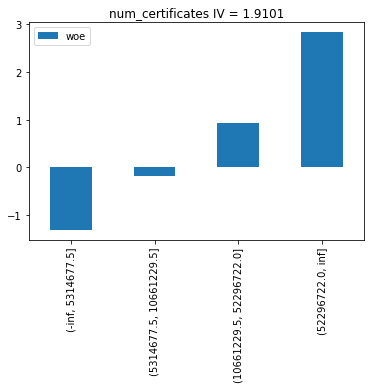

In [144]:
_,freq,iv = optimal_binning_boundary(x=bi.actual_capital_formatted.fillna(0),
                                     y=bi.Y,
                                     bins=4)
display(freq)
freq.plot(y='woe',kind='bar',xlabel='',title=f'num_certificates IV = {iv:.4f}')

In [145]:
woe = woe.append(freq.assign(feature='actual_capital_formatted'))

#### duration

In [128]:
bi.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2662 entries, 1A0E31CD67E5D849C99C3F34112D193D to 223A24992E2387E93FC4DAE6F36F74C0
Data columns (total 10 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Y                         2662 non-null   int64  
 1   company_name              2662 non-null   object 
 2   credit_code               2652 non-null   object 
 3   industry_all              2652 non-null   object 
 4   district                  2565 non-null   object 
 5   city                      2622 non-null   object 
 6   reg_location              2651 non-null   object 
 7   actual_capital_formatted  2662 non-null   int64  
 8   reg_capital_formatted     2662 non-null   int64  
 9   duration                  2662 non-null   float64
dtypes: float64(1), int64(3), object(6)
memory usage: 293.3+ KB


col_0,0,1,woe
row_0,,,
"(-inf, 4.5301371]",494,75,-1.742054
"(4.5301371, 7.1547945]",433,235,-0.468159
"(7.1547945, 18.4356165]",479,801,0.657153
"(18.4356165, inf]",20,125,1.975574


<AxesSubplot:title={'center':'duration IV = 0.9281'}>

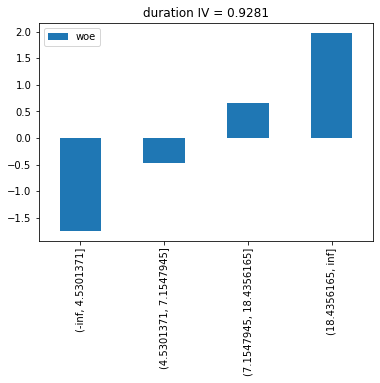

In [147]:
_,freq,iv = optimal_binning_boundary(x=bi.duration.fillna(0),
                                     y=bi.Y,
                                     bins=4)
display(freq)
freq.plot(y='woe',kind='bar',xlabel='',title=f'duration IV = {iv:.4f}')

In [148]:
woe = woe.append(freq.assign(feature='duration'))

#### reg_capital_formatted

col_0,0,1,woe
row_0,,,
"(-inf, 11050045.0]",1055,232,-1.371566
"(11050045.0, 20525540.0]",181,136,-0.142849
"(20525540.0, 63480000.0]",160,303,0.781552
"(63480000.0, inf]",30,565,3.078621


<AxesSubplot:title={'center':'reg_capital_formatted IV = 2.2061'}>

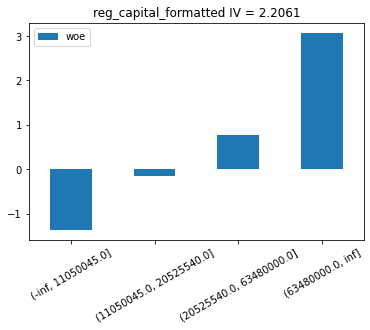

In [150]:
bins,freq,iv = optimal_binning_boundary(x=bi.reg_capital_formatted.fillna(0),
                                     y=bi.Y,
                                     bins=4)
display(freq,
        freq.plot(y='woe',kind='bar',xlabel='',title=f'reg_capital_formatted IV = {iv:.4f}',rot=30))

In [151]:
woe = woe.append(freq.assign(feature='reg_capital_formatted'))

### 资质证书WOE

#### num_certificates

In [44]:
cert_sample.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2662 entries, 1A0E31CD67E5D849C99C3F34112D193D to 223A24992E2387E93FC4DAE6F36F74C0
Data columns (total 2 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Y                 2662 non-null   int64  
 1   num_certificates  2025 non-null   float64
dtypes: float64(1), int64(1)
memory usage: 126.9+ KB


col_0,0,1,woe
row_0,,,
"(-inf, 1.5]",920,192,-1.423885
"(1.5, 2.5]",220,161,-0.169230
"(2.5, 5.5]",212,394,0.762758
"(5.5, inf]",74,489,2.031290


<AxesSubplot:title={'center':'num_certificates IV = 1.5295'}>

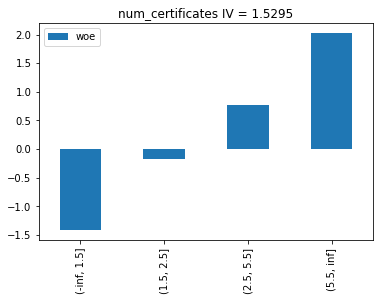

In [152]:
_,cert_freq,iv = optimal_binning_boundary(x=cert_sample.fillna(0).num_certificates,
                                     y=cert_sample.Y,
                                     bins=4)
display(cert_freq)
cert_freq.plot(y='woe',kind='bar',xlabel='',title=f'num_certificates IV = {iv:.4f}')

In [153]:
woe = woe.append(cert_freq.assign(feature="num_certificates"))

### 融资WOE

In [154]:
feature_fundings.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2662 entries, 1A0E31CD67E5D849C99C3F34112D193D to 223A24992E2387E93FC4DAE6F36F74C0
Data columns (total 6 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Y                                2662 non-null   int64  
 1   money_q25_sum_weighted           773 non-null    float64
 2   rounds                           773 non-null    float64
 3   most_recent_money_q25_formatted  773 non-null    float64
 4   most_recent_time                 773 non-null    float64
 5   avg_funding_interval             773 non-null    float64
dtypes: float64(5), int64(1)
memory usage: 210.1+ KB


#### money_q25_sum_weighted

In [630]:
feature_fundings.query('money_q25_sum_weighted<600000')

,Y,money_q25_sum_weighted,rounds,most_recent_money_q25_formatted,most_recent_time,avg_funding_interval
company_id,,,,,,
6EB6D78F122ABAC1B464DBD21EB51F52,0,250000.000000,1.0,1000000.0,3.290411,3.290411
5B07681435D7D4EADBA756DD63F1B063,0,200000.000000,1.0,1000000.0,3.597260,3.597260
D02290600F6DDBB25B01213A61681CEA,0,125000.000000,1.0,1000000.0,6.693151,6.693151
CC4B157E646A173FFC7076A06A8371F8,0,512500.000000,1.0,6150000.0,11.487671,11.487671
F490F4079C9EB5D18266E598AC065254,0,166666.666667,1.0,1000000.0,4.515068,4.515068
0BE5827C7DB485E89FFFBCFF6C6D8B0D,0,200000.000000,1.0,1000000.0,4.087671,4.087671
BE4A384C2B77C4B0F28011A3A8303173,0,473076.923077,1.0,6150000.0,12.487671,12.487671
EA0B8909087511410939CD21F659E279,0,166666.666667,1.0,1000000.0,5.353425,5.353425
2BD2DA4424781EEFFA594F0B355B0698,0,200000.000000,1.0,1000000.0,4.095890,4.095890


col_0,0,1,woe
row_0,,,
"(-inf, 597916.65625]",1401,508,-0.869957
"(597916.65625, 3581250.0]",16,139,2.306389
"(3581250.0, 22682129.0]",9,193,3.209969
"(22682129.0, inf]",1,395,6.123389


<AxesSubplot:title={'center':'money_q25_sum_weighted IV = 3.1656'}>

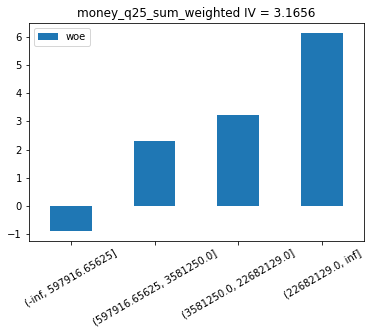

In [155]:
boundary,freq,iv = optimal_binning_boundary(x=feature_fundings.money_q25_sum_weighted.fillna(0),
                                     y=feature_fundings.Y,
                                     bins=4)
display(freq,
        freq.plot(y='woe',kind='bar',xlabel='',title=f'money_q25_sum_weighted IV = {iv:.4f}',rot=30))

In [156]:
woe = woe.append(freq.assign(feature='money_q25_sum_weighted'))

In [231]:
from scipy.stats import spearmanr
spearman = lambda x: spearmanr(x.iloc[:,0], x.iloc[:,1])[0]
def spearman_box(df, n = 20, r_thr=1):
    r = 0
    while np.abs(r) < r_thr:
        categ = pd.qcut(df.iloc[:,0], n, duplicates='drop')
        d2 = df.groupby(categ).mean()
        r = spearman(d2)
        n = n - 1
    freq = pd.crosstab(categ, df.iloc[:,1]).reset_index()
    freq['woe'] = np.log(freq[1]/freq[0]*freq[0].sum()/freq[1].sum())
    iv = freq.woe.dot((freq[1]/freq[1].sum()-freq[0]/freq[0].sum()))
    return freq.set_index(freq.columns[0]),iv

#### rounds

col_0,0,1,woe
row_0,,,
"(-inf, 0.5]",1389,500,-0.877228
"(0.5, 2.5]",37,289,2.200012
"(2.5, inf]",1,446,6.244822


<AxesSubplot:title={'center':'rounds IV = 3.2073'}>

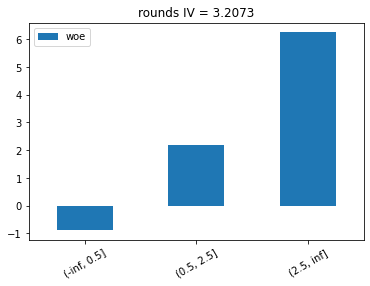

In [157]:
_,freq,iv = optimal_binning_boundary(x=feature_fundings.rounds.fillna(0),
                                     y=feature_fundings.Y,
                                     bins=20)
display(freq,
        freq.plot(y='woe',kind='bar',xlabel='',title=f'rounds IV = {iv:.4f}',rot=30))

In [158]:
woe = woe.append(freq.assign(feature='rounds'))

#### most_recent_money_q25_formatted--MANUAL

col_0,0,1,woe
row_0,,,
"(-inf, 3000000.0]",1399,510,-0.864599
"(3000000.0, 76300000.0]",27,481,3.024534
"(76300000.0, inf]",1,244,5.641672


<AxesSubplot:title={'center':'most_recent_money_q25_formatted IV = 2.7220'}>

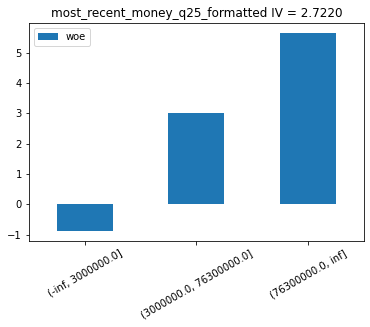

In [159]:
_,freq,iv = optimal_binning_boundary(x=feature_fundings.most_recent_money_q25_formatted.fillna(0),
                                     y=feature_fundings.Y,
                                     bins=3)
display(freq,
        freq.plot(y='woe',kind='bar',xlabel='',title=f'most_recent_money_q25_formatted IV = {iv:.4f}',rot=30))

In [160]:
woe = woe.append(freq.assign(feature='most_recent_money_q25_formatted'))

#### most_recent_time--MANUAL

col_0,0,1,woe
row_0,,,
"(-inf, 0.1589041]",1389,500,-0.877228
"(0.1589041, 2.3986301]",6,345,4.196288
"(2.3986301, 3.0068493]",1,145,5.121237
"(3.0068493, inf]",31,245,2.211774


<AxesSubplot:title={'center':'most_recent_time IV = 2.6417'}>

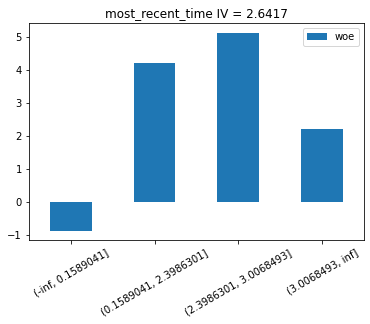

In [161]:
_,freq,iv = optimal_binning_boundary(x=feature_fundings.most_recent_time.fillna(0),
                                     y=feature_fundings.Y,
                                     bins=4)
display(freq,
        freq.plot(y='woe',kind='bar',xlabel='',title=f'most_recent_time IV = {iv:.4f}',rot=30))

In [162]:
woe = woe.append(freq.assign(feature='most_recent_time'))

#### avg_funding_interval

col_0,0,1,woe
row_0,,,
"(-inf, 0.04794521]",1390,500,-0.877948
"(0.04794521, 1.1869863]",1,298,5.841597
"(1.1869863, 3.0068493]",5,290,4.204946
"(3.0068493, inf]",31,147,1.700949


<AxesSubplot:title={'center':'avg_funding_interval IV = 3.0434'}>

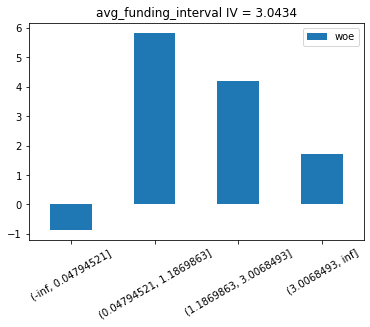

In [163]:
bins,freq,iv = optimal_binning_boundary(x=feature_fundings.avg_funding_interval.fillna(0),
                                     y=feature_fundings.Y,
                                     bins=4)
display(freq,
        freq.plot(y='woe',kind='bar',xlabel='',title=f'avg_funding_interval IV = {iv:.4f}',rot=30))

In [164]:
woe = woe.append(freq.assign(feature='avg_funding_interval'))

#### num_trademarks_total

col_0,0,1,woe
row_0,,,
"(-inf, 0.5]",882,160,-1.564025
"(0.5, 3.5]",366,203,-0.446434
"(3.5, 19.5]",159,348,0.926291
"(19.5, inf]",19,525,3.461952


<AxesSubplot:title={'center':'num_trademarks_total IV = 2.3880'}>

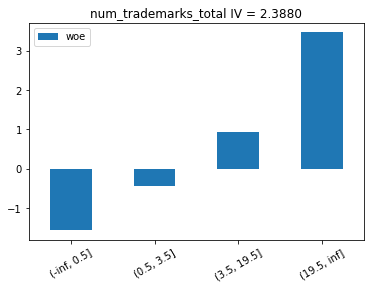

In [165]:
bins,freq,iv = optimal_binning_boundary(x=tm.num_trademarks_total.fillna(0),
                                     y=tm.Y,
                                     bins=4)
display(freq,
        freq.plot(y='woe',kind='bar',xlabel='',title=f'num_trademarks_total IV = {iv:.4f}',rot=30))

In [166]:
woe = woe.append(freq.assign(feature='num_trademarks_total'))

#### num_trademarks_registered

col_0,0,1,woe
row_0,,,
"(-inf, 1.5]",295,147,-1.378599
"(1.5, 3.5]",136,143,-0.631867
"(3.5, 13.5]",93,268,0.376331
"(13.5, inf]",20,518,2.572186


<AxesSubplot:title={'center':'num_trademarks_registered IV = 1.8064'}>

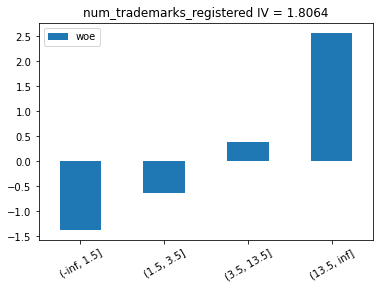

In [632]:
bins,freq,iv = optimal_binning_boundary(x=tm.num_trademarks_registered.dropna(),
                                     y=tm.loc[tm.num_trademarks_registered.notna()].Y,
                                     bins=4)
display(freq,
        freq.plot(y='woe',kind='bar',xlabel='',title=f'num_trademarks_registered IV = {iv:.4f}',rot=30))

In [168]:
woe = woe.append(freq.assign(feature='num_trademarks_registered'))

#### reg_num

col_0,0,1,woe
row_0,,,
"(-inf, 10.5]",1321,730,-0.448596
"(10.5, 16.5]",61,79,0.403077
"(16.5, 38.5]",44,195,1.633313
"(38.5, inf]",1,231,5.586921


<AxesSubplot:title={'center':'reg_num IV = 1.4073'}>

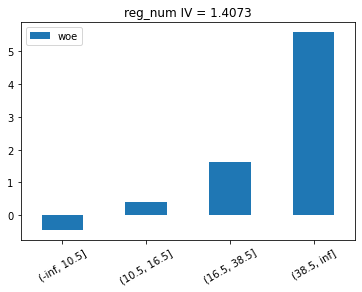

In [169]:
bins,freq,iv = optimal_binning_boundary(x=reg.reg_num.fillna(0),
                                     y=reg.Y,
                                     bins=4)
display(freq,
        freq.plot(y='woe',kind='bar',xlabel='',title=f'reg_num IV = {iv:.4f}',rot=30))

In [170]:
woe = woe.append(freq.assign(feature='reg_num'))

#### reg_growth_ratio

col_0,0,1,woe
row_0,,,
"(-inf, -500.0]",904,463,-0.526109
"(-500.0, 0.2480769]",227,362,0.609687
"(0.2480769, 1.5227273]",203,196,0.107902
"(1.5227273, inf]",92,215,0.991842


<AxesSubplot:title={'center':'reg_growth_ratio IV = 0.3282'}>

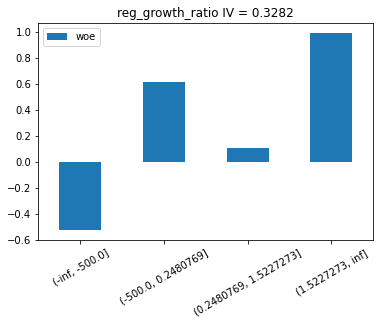

In [629]:
bins,freq,iv = optimal_binning_boundary(x=reg.reg_growth_ratio.fillna(-999),
                                     y=reg.Y,
                                     bins=4)
display(freq,
        freq.plot(y='woe',kind='bar',xlabel='',title=f'reg_growth_ratio IV = {iv:.4f}',rot=30))

In [172]:
woe = woe.append(freq.assign(feature='reg_growth_ratio'))

#### reg_3y_avg

col_0,0,1,woe
row_0,,,
"(-inf, 0.5]",934,524,-0.434992
"(0.5, 10.125]",463,536,0.289400
"(10.125, inf]",29,176,1.946181


<AxesSubplot:title={'center':'reg_3y_avg IV = 0.3696'}>

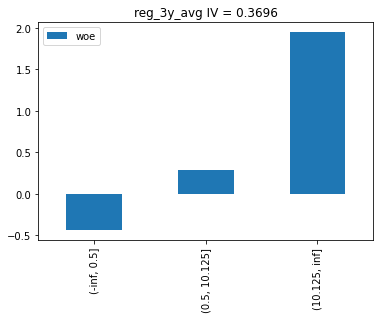

In [173]:
_,freq,iv = optimal_binning_boundary(x=reg.reg_3y_avg.fillna(0),
                                     y=reg.Y,
                                     bins=3)
display(freq)
freq.plot(y='woe',kind='bar',xlabel='',title=f'reg_3y_avg IV = {iv:.4f}')

In [174]:
woe = woe.append(freq.assign(feature='reg_3y_avg'))

#### team_member--MANUAL

col_0,0,1,woe
row_0,,,
"(-inf, 0.5]",1347,317,-1.303740
"(0.5, 1.5]",63,311,1.739651
"(1.5, 3.5]",13,209,2.920378
"(3.5, inf]",3,399,5.033342


<AxesSubplot:title={'center':'member IV = 3.3395'}>

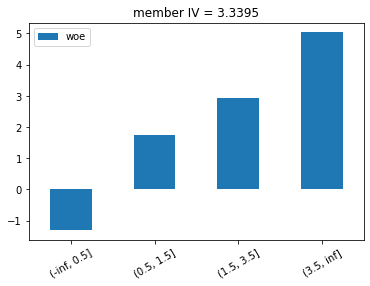

In [175]:
bins,freq,iv = optimal_binning_boundary(x=member.num_members.fillna(0),
                                     y=member.Y,
                                     bins=4)
display(freq,
        freq.plot(y='woe',kind='bar',xlabel='',title=f'member IV = {iv:.4f}',rot=30))

In [176]:
woe = woe.append(freq.assign(feature='num_members'))

In [177]:
woe.groupby('feature')['woe'].nunique()

feature
actual_capital_formatted           4
avg_funding_interval               4
duration                           4
money_q25_sum_weighted             4
most_recent_money_q25_formatted    3
most_recent_time                   4
num_certificates                   4
num_members                        4
num_trademarks_registered          4
num_trademarks_total               4
reg_3y_avg                         3
reg_capital_formatted              4
reg_growth_ratio                   3
reg_num                            4
rounds                             3
Name: woe, dtype: int64

In [ ]:
#woe['woe_scaled'] = woe.groupby('feature').woe.transform(lambda x:)

## 非专利数据WOE映射

In [179]:
cols = ['actual_capital_formatted', 'duration', 'reg_capital_formatted',
       'num_certificates', 'money_q25_sum_weighted', 'rounds',
       'most_recent_money_q25_formatted', 'most_recent_time',
       'avg_funding_interval', 'num_trademarks_total',
       'num_trademarks_registered', 'reg_num', 'reg_growth_ratio',
       'reg_3y_avg', 'num_members']

In [591]:
# raw_np = pd.read_csv('v2_20210318_sse_company_nonpatent_indicators.csv',
#                      usecols=cols+['company_id'], index_col='company_id')
raw_np = pd.concat([cert_sample,feature_fundings,tm,reg,member,bi],axis=1).drop('Y',axis=1)
raw_np=sample.join(raw_np)
raw_np.fillna({'reg_growth_ratio':-999},inplace=True)
raw_np.fillna(0,inplace=True)

In [592]:
raw_np.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2662 entries, 1A0E31CD67E5D849C99C3F34112D193D to 223A24992E2387E93FC4DAE6F36F74C0
Data columns (total 22 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Y                                2662 non-null   int64  
 1   num_certificates                 2662 non-null   float64
 2   money_q25_sum_weighted           2662 non-null   float64
 3   rounds                           2662 non-null   float64
 4   most_recent_money_q25_formatted  2662 non-null   float64
 5   most_recent_time                 2662 non-null   float64
 6   avg_funding_interval             2662 non-null   float64
 7   num_trademarks_registered        2662 non-null   float64
 8   num_trademarks_total             2662 non-null   float64
 9   reg_num                          2662 non-null   float64
 10  reg_growth_ratio                 2662 non-null   float64
 11  reg_3y_avg                  

### WOE AND IV

In [528]:
# plt.figure(figsize=(40,25))
ivs = pd.DataFrame()
for i,w in enumerate(raw_np.columns[raw_np.dtypes.ne(object)],1):
    bins,freq,iv = optimal_binning_boundary(x=raw_np[w],
                                         y=raw_np.Y,
                                     bins=4)
    ivs.loc[w,'iv'] = iv
#     freq.plot(ax=plt.subplot(4,4,i), y='woe',kind='bar',xlabel='',title=f'{w} IV = {iv:.4f}',rot=30)

<AxesSubplot:>

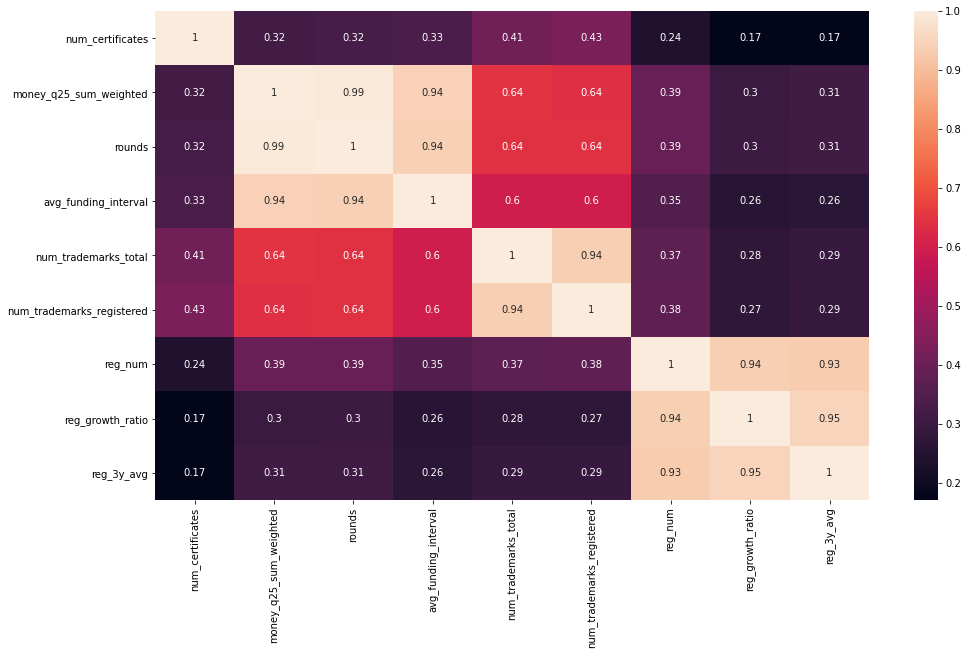

In [503]:
plt.figure(figsize=(16,9))
sns.heatmap(raw_np[model_cols].corr(method='spearman'),annot=True)

## 共线性

In [520]:
model_cols

['num_certificates',
 'money_q25_sum_weighted',
 'rounds',
 'avg_funding_interval',
 'num_trademarks_registered',
 'reg_num',
 'reg_growth_ratio',
 'num_trademarks_total']

In [594]:
# ! MULTI-COLLINEARITY CHECK

dt_mc = raw_np.loc[:,raw_np.dtypes.ne(object)].drop('num_trademarks_registered',axis=1)
dt_mc = raw_np.loc[:,model_cols].drop('num_trademarks_registered',axis=1)
## droped: 'num_trademarks_total',

def sklearn_vif(exogs, data):
    vif_dict, tolerance_dict = {}, {}
    for exog in exogs:
        not_exog = [i for i in exogs if i != exog]
        X, y = data[not_exog], data[exog]
        r_squared = LinearRegression().fit(X, y).score(X, y)
        vif = 1/(1 - r_squared + 1e-5)
        vif_dict[exog] = vif
        tolerance = 1 - r_squared
        tolerance_dict[exog] = tolerance
    df_vif = pd.DataFrame({'VIF': vif_dict, 'Tolerance': tolerance_dict})
    return df_vif

thre_vif = 10.0
X = dt_mc.copy()
curr_X = X.copy()
curr_X['intercept'] = 1
col = curr_X.columns.tolist()
dropped, mc_col2drop = True, []
while dropped:
    curr_X = curr_X[col].copy()
    dropped = False
    vif = sklearn_vif(curr_X.columns, curr_X.fillna(0.0))['VIF'].tolist()
    maxvif = max(vif)
    maxix = vif.index(maxvif)
    if col[maxix] == 'intercept':
        maxvif = np.sort(vif)[-2]
        maxix = vif.index(maxvif)
    if maxvif > thre_vif:
        print('delete=', col[maxix], '  ', 'vif=', maxvif)
        dropped = True
        regression_model = LinearRegression()
        regression_model.fit(curr_X[[ele for ele in col if ele != col[maxix]]].fillna(0.0), curr_X[col[maxix]].fillna(0.0))
        y_pred = regression_model.predict(curr_X[[ele for ele in col if ele != col[maxix]]].fillna(0.0))
        print(f"prediction and actual correlation achieves: {np.corrcoef(y_pred, curr_X[col[maxix]].fillna(0.0))[0][1]}\n\n")
        contrib_other_features = pd.DataFrame(
            dict(zip(curr_X[[ele for ele in col if ele != col[maxix]]].columns, regression_model.coef_)), index=[0]
        ).transpose().rename({0: 'weight'}, axis=1).sort_values(by='weight', ascending=False)
        print(f"\nTop 5 correlated features: {contrib_other_features.head(5)}\n\n"
              f"Top 5 negative-correlated features: {contrib_other_features.tail(5)}\n\n\n")
        mc_col2drop.append(col[maxix])
        del col[maxix]
print(f"Multi-colliearity columns are: {mc_col2drop}, not yet dropped")

Multi-colliearity columns are: [], not yet dropped


In [513]:
raw_np.loc[:,raw_np.dtypes.ne(object)].columns

Index(['Y', 'num_certificates', 'money_q25_sum_weighted', 'rounds',
       'most_recent_money_q25_formatted', 'most_recent_time',
       'avg_funding_interval', 'num_trademarks_registered',
       'num_trademarks_total', 'reg_num', 'reg_growth_ratio', 'reg_3y_avg',
       'num_members', 'actual_capital_formatted', 'reg_capital_formatted',
       'duration'],
      dtype='object')

In [537]:
for col in woe.feature.unique():
    woe_ = woe.query('feature==@col')
    raw_np[col] = woe_.loc[raw_np[col],'woe'].tolist()

In [438]:
## Rel0.0.2
# old_woe = pd.read_csv('D:/Data/tech_inno_docker/tech_inno_index/score_assistant/feature_bin_woe_v2_20210318_final_nonpatent_modified_manual.csv',
#                          usecols=('q_feature','feature','woe','q_feature_value'))

# old_woe.query("feature in ['avg_funding_interval', 'most_recent_time'] or q_feature!='tNone'",inplace=True)

# for col in old_woe.feature.unique():
#     woe_ = old_woe.query('feature==@col').sort_values('q_feature_value')
#     bins = [-np.inf]+woe_.q_feature_value.tolist()[:-1]+[np.inf]
#     raw_np[col] = pd.cut(raw_np[col],bins,labels=woe_.woe)
# raw_np = raw_np.astype(float,errors='ignore')

# raw_np[new_np.columns] = new_np.reindex(raw_np.index)

## 模型训练

In [538]:
company_id_train = np.unique(np.load(r'D:\Data\tech-score-api\sample_data\model_result\train_valid_test\company_id_train_final.npy', allow_pickle=True))
company_id_test = np.unique(np.load(r'D:\Data\tech-score-api\sample_data\model_result\train_valid_test\company_id_test_final.npy', allow_pickle=True))
company_id_validate = np.unique(np.load(r'D:\Data\tech-score-api\sample_data\model_result\train_valid_test\company_id_validate_final.npy', allow_pickle=True))

In [539]:
train,test,valid = raw_np.reindex(company_id_train),raw_np.reindex(company_id_test),raw_np.reindex(company_id_validate)

In [540]:
lr = LogisticRegression(solver = 'liblinear',random_state = 42)

In [612]:
clf = GridSearchCV(lr,
                   param_grid = {'C':[.0005,.001,.01,.015,.02],'penalty':['l1','l2'], 'class_weight':[None,'balanced']},
                   n_jobs=-1,scoring='f1')

In [620]:
model_cols = [  
       'num_certificates', 'money_q25_sum_weighted', 'rounds',
#        'most_recent_money_q25_formatted', 'most_recent_time','reg_3y_avg',
#        'duration','num_members','actual_capital_formatted','reg_capital_formatted',
       'avg_funding_interval','num_trademarks_registered',
        'reg_num', 'reg_growth_ratio',
       'num_trademarks_total']

In [621]:
clf.fit(pd.concat([train,valid],axis=0)[model_cols],pd.concat([train,valid],axis=0).Y)

GridSearchCV(estimator=LogisticRegression(random_state=42, solver='liblinear'),
             n_jobs=-1,
             param_grid={'C': [0.0005, 0.001, 0.01, 0.015, 0.02],
                         'class_weight': [None, 'balanced'],
                         'penalty': ['l1', 'l2']},
             scoring='f1')

In [622]:
display(clf.best_score_, clf.best_params_)

0.8552365222858711

{'C': 0.015, 'class_weight': None, 'penalty': 'l2'}

In [623]:
f1_score(test.Y,clf.predict(test[model_cols]))

0.8739495798319329

In [624]:
clf.best_estimator_.coef_

array([[0.78667844, 0.27596186, 0.18490913, 0.27027196, 0.28480489,
        0.35603329, 0.07760371, 0.28702851]])

In [625]:
np_fi = pd.DataFrame({'feature':model_cols,'imp':clf.best_estimator_.coef_.ravel()})\
            .sort_values('imp',ascending=False)\
            .set_index('feature')
np_fi.imp.transform(lambda x:x/x.sum()*.85)

feature
num_certificates             0.265002
reg_num                      0.119934
num_trademarks_total         0.096689
num_trademarks_registered    0.095940
money_q25_sum_weighted       0.092961
avg_funding_interval         0.091044
rounds                       0.062289
reg_growth_ratio             0.026142
Name: imp, dtype: float64

In [548]:
np_fi.to_pickle('fi_nonpatent_v3.pkl')

## WOE/feature importance存储

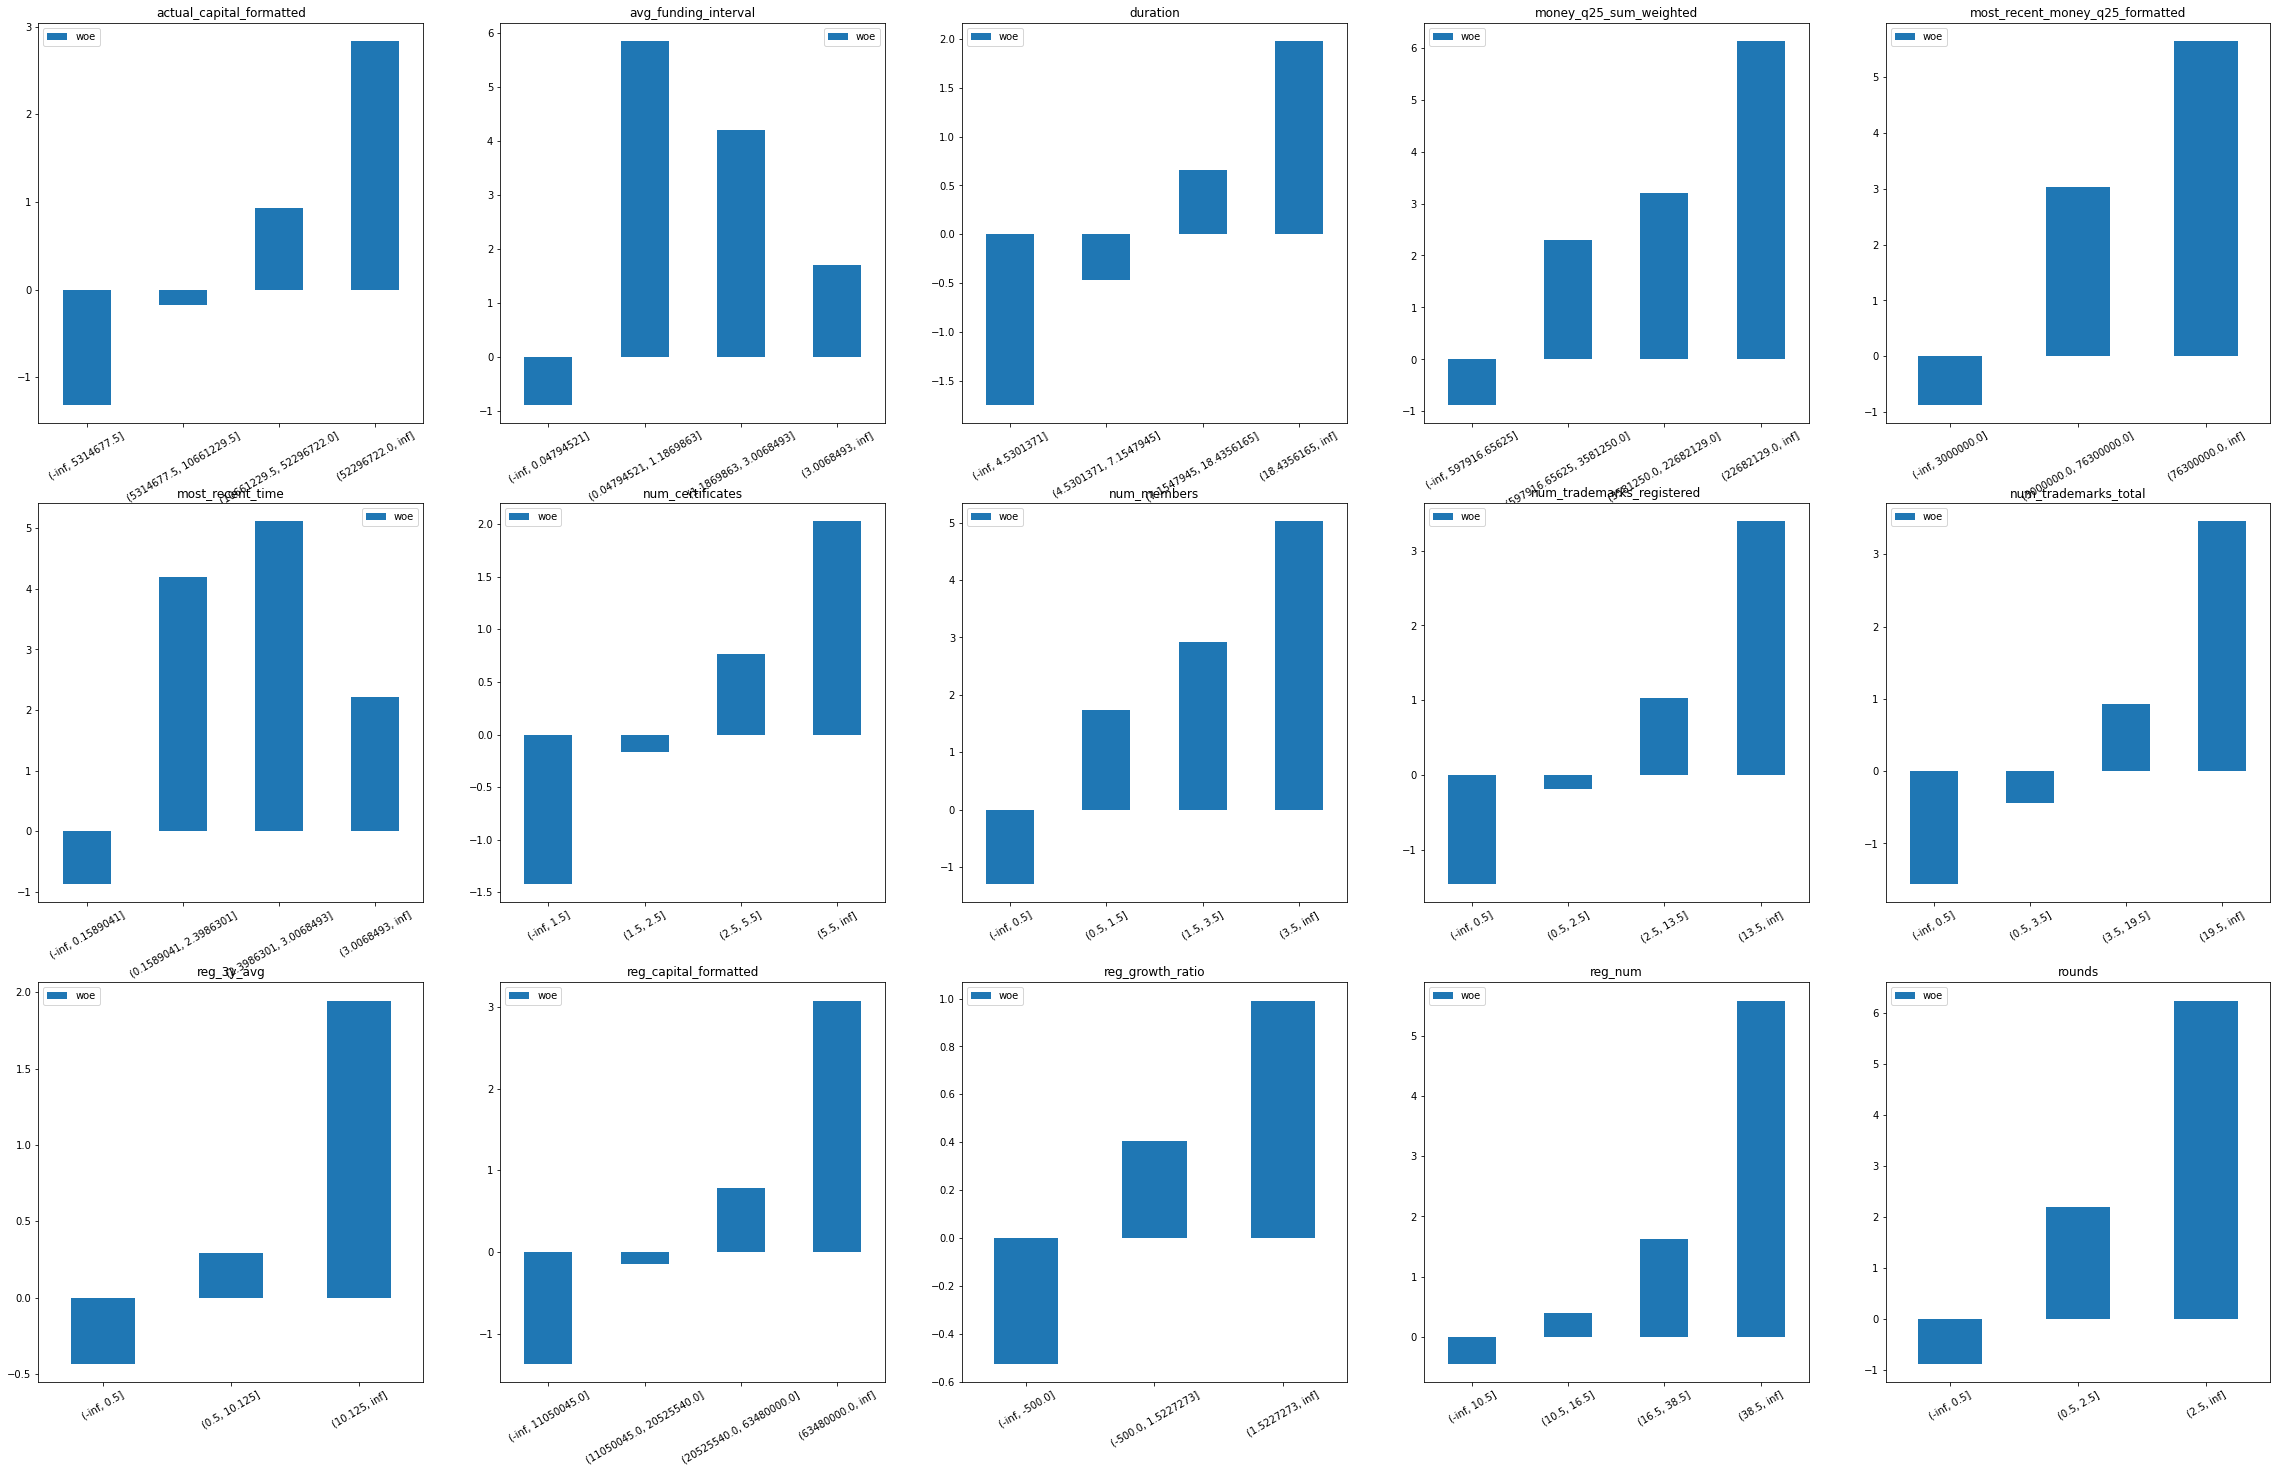

In [266]:
plt.figure(figsize=(40,25))
for i,w in enumerate(sorted(woe.feature.unique()),1):
    woe.query('feature==@w').round(5).plot(ax=plt.subplot(3,5,i),
                                           y='woe',
                                           title=f'{w}',kind='bar',
                                           rot=30,xlabel='')

In [267]:
woe.to_pickle('woe_v3.pkl')

In [322]:
np_fi.to_pickle('fi_nonpatent_v3.pkl')

## 全国数据计算

### READ IN

In [270]:
quanguo_cert = format_data_certificate(path=r'D:\Data\完成跑分项目\quanguo\quanguo\full_data\innovationCertificate.json',
                                       now=pd.Timestamp(2021,5,25))

In [280]:
quanguo_cert.info()

<class 'pandas.core.frame.DataFrame'>
Index: 490255 entries, 00001FF532C2D92470F99149D48C7820 to FFFFF51AB69F00656AE94BC3C57CC8D2
Data columns (total 1 columns):
 #   Column            Non-Null Count   Dtype
---  ------            --------------   -----
 0   num_certificates  490255 non-null  int64
dtypes: int64(1)
memory usage: 7.5+ MB


In [278]:
quanguo_fund = format_data_funding(path=r'D:\Data\完成跑分项目\quanguo\quanguo\full_data\innovationFunding.json',
                                   now=pd.Timestamp(2021,5,25))

D:\Program Files\Miniconda3\lib\site-packages\ipykernel_launcher.py:14: FutureWarning: The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead
  


In [467]:
quanguo_fund2 = format_data_funding2(path=r'D:\Data\完成跑分项目\quanguo\quanguo\full_data\innovationFunding.json',
                                   now=pd.Timestamp(2021,5,25))

D:\Program Files\Miniconda3\lib\site-packages\ipykernel_launcher.py:14: FutureWarning: The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead
  


In [468]:
quanguo_fund2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 67251 entries, ADCBCC6C475BF07B6D04651F87171D22 to C6987B1A9CACDA2A6DD0008C6DA24223
Data columns (total 5 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   money_q25_sum_weighted           67251 non-null  float64
 1   rounds                           67108 non-null  float64
 2   most_recent_money_q25_formatted  67251 non-null  float64
 3   most_recent_time                 67251 non-null  float64
 4   avg_funding_interval             67251 non-null  float64
dtypes: float64(5)
memory usage: 3.1+ MB


In [284]:
quanguo_fund.info()

<class 'pandas.core.frame.DataFrame'>
Index: 67108 entries, ADCBCC6C475BF07B6D04651F87171D22 to C6987B1A9CACDA2A6DD0008C6DA24223
Data columns (total 5 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   money_q25_sum_weighted           67108 non-null  float64
 1   rounds                           67108 non-null  int64  
 2   most_recent_money_q25_formatted  67108 non-null  float64
 3   most_recent_time                 67108 non-null  float64
 4   avg_funding_interval             67108 non-null  float64
dtypes: float64(4), int64(1)
memory usage: 3.1+ MB


In [479]:
quanguo_fund.columns,quanguo_fund2.columns

(Index(['money_q25_sum_weighted', 'rounds', 'most_recent_money_q25_formatted',
        'most_recent_time', 'avg_funding_interval'],
       dtype='object'),
 Index(['money_q25_sum_weighted', 'rounds', 'most_recent_money_q25_formatted',
        'most_recent_time', 'avg_funding_interval'],
       dtype='object'))

In [492]:
def diff_num(new,old,col):
    a=new[[col]].join(old[[col]],how='outer',lsuffix='_new',rsuffix='_old').fillna(0)
    return a.query(f'{col}_old!={col}_new').shape[0]

In [491]:
diff_num(quanguo_fund,quanguo_fund2,'money_q25_sum_weighted')

(447, 2)

In [494]:
diff_num(quanguo_fund,quanguo_fund2,'rounds')

0

In [495]:
diff_num(quanguo_fund,quanguo_fund2,'most_recent_money_q25_formatted')

134

In [496]:
diff_num(quanguo_fund,quanguo_fund2,'most_recent_time')

265

In [498]:
diff_num(quanguo_fund,quanguo_fund2,'avg_funding_interval')

577

In [287]:
quanguo_tm = readin_tm(r'D:\Data\完成跑分项目\quanguo\quanguo\full_data\innovationTrademark.json')

In [288]:
quanguo_tm.info()

<class 'pandas.core.frame.DataFrame'>
Index: 483321 entries, 00005735D06B9084BAD042D6F4D263CA to FFFF890C7D86CA12F259BCAA9B822615
Data columns (total 2 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   num_trademarks_registered  483321 non-null  float64
 1   num_trademarks_total       483321 non-null  int64  
dtypes: float64(1), int64(1)
memory usage: 11.1+ MB


In [293]:
quanguo_reg = readin_reg(now=pd.Timestamp(2021,5,25),
                        path=r'D:\Data\完成跑分项目\quanguo\quanguo\full_data\innovationCopyRegs.json')

In [295]:
quanguo_reg.info()

<class 'pandas.core.frame.DataFrame'>
Index: 302257 entries, 00001FF532C2D92470F99149D48C7820 to FFFFE42F6484FEC563A1C55993BE494C
Data columns (total 3 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   reg_num           302257 non-null  int64  
 1   reg_growth_ratio  302257 non-null  float64
 2   reg_3y_avg        263006 non-null  float64
dtypes: float64(2), int64(1)
memory usage: 9.2+ MB


In [297]:
quanguo_member = format_data_teammember(r'D:\Data\完成跑分项目\quanguo\quanguo\full_data\innovationTeamMember.json')

In [298]:
quanguo_member.info()

<class 'pandas.core.frame.DataFrame'>
Index: 143026 entries, 00009A2BE889CB258AF6859DC4CCFE00 to FFFFE42F6484FEC563A1C55993BE494C
Data columns (total 1 columns):
 #   Column       Non-Null Count   Dtype
---  ------       --------------   -----
 0   num_members  143026 non-null  int64
dtypes: int64(1)
memory usage: 2.2+ MB


In [302]:
quanguo_bi = format_data_basicinfo(now=pd.Timestamp(2021,6,25),
                                   path=r'D:\Data\完成跑分项目\quanguo\quanguo\full_data\innovationBaseInfo.json')

D:\Program Files\Miniconda3\lib\site-packages\ipykernel_launcher.py:14: FutureWarning: The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead
  


In [303]:
quanguo_bi.info()

<class 'pandas.core.frame.DataFrame'>
Index: 804436 entries, 9A67D6BEA5EEC8F2E84E1608C7428939 to 6184611EDEB9ACB75E093EA8D40B231B
Data columns (total 4 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   company_name              804436 non-null  object 
 1   actual_capital_formatted  804436 non-null  int64  
 2   reg_capital_formatted     804436 non-null  int64  
 3   duration                  804436 non-null  float64
dtypes: float64(1), int64(2), object(1)
memory usage: 30.7+ MB


### MERGE & FILLNA

In [553]:
quanguo_np = pd.concat([quanguo_bi,quanguo_cert,quanguo_fund,quanguo_tm,quanguo_reg,quanguo_member],axis=1)

In [309]:
quanguo_np.info()

<class 'pandas.core.frame.DataFrame'>
Index: 804436 entries, 9A67D6BEA5EEC8F2E84E1608C7428939 to 6184611EDEB9ACB75E093EA8D40B231B
Data columns (total 16 columns):
 #   Column                           Non-Null Count   Dtype  
---  ------                           --------------   -----  
 0   company_name                     804436 non-null  object 
 1   actual_capital_formatted         804436 non-null  int64  
 2   reg_capital_formatted            804436 non-null  int64  
 3   duration                         804436 non-null  float64
 4   num_certificates                 490255 non-null  float64
 5   money_q25_sum_weighted           67108 non-null   float64
 6   rounds                           67108 non-null   float64
 7   most_recent_money_q25_formatted  67108 non-null   float64
 8   most_recent_time                 67108 non-null   float64
 9   avg_funding_interval             67108 non-null   float64
 10  num_trademarks_registered        483321 non-null  float64
 11  num_trademark

In [554]:
quanguo_np.fillna({'reg_growth_ratio':-999},inplace=True)
quanguo_np.fillna(0,inplace=True)

In [311]:
quanguo_np.to_pickle('quanguo_nonpatent_v3.pkl')

### WOE映射

In [351]:
quanguo_np = pd.read_pickle('quanguo_nonpatent_v3.pkl')

In [555]:
for col in woe.feature.unique():
    woe_ = woe.query('feature==@col')
    woe_.woe = woe_.woe.transform(lambda x:(x-x.min())/np.ptp(x))
    quanguo_np[col] = woe_.loc[quanguo_np[col],'woe'].tolist()

D:\Program Files\Miniconda3\lib\site-packages\pandas\core\generic.py:5494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


In [556]:
quanguo_np.head()

,company_name,actual_capital_formatted,reg_capital_formatted,duration,num_certificates,money_q25_sum_weighted,rounds,most_recent_money_q25_formatted,most_recent_time,avg_funding_interval,num_trademarks_registered,num_trademarks_total,reg_num,reg_growth_ratio,reg_3y_avg,num_members
company_id,,,,,,,,,,,,,,,,
9A67D6BEA5EEC8F2E84E1608C7428939,厦门一起文化传媒有限公司,0.000000,0.000000,0.342663,0.00000,0.583401,1.000000,0.597751,0.845802,1.000000,0.000000,0.000000,0.0,0.0,0.0,1.000000
262C72169FC82C0C17B7ACDD51D230DA,新疆天山制药工业有限公司,1.000000,1.000000,1.000000,1.00000,0.454195,0.432072,0.597751,0.514965,0.383790,0.261480,0.222363,0.0,0.0,0.0,0.480251
F8EAA80230208C214D04985BB0E0ED89,深圳市点石创新投资有限公司,0.541257,0.483826,0.645360,0.00000,0.000000,0.432072,0.000000,0.514965,0.383790,0.000000,0.000000,0.0,0.0,0.0,0.666571
0FB1D0A875975902F5B83520AAF637C1,浙江美盾防护技术有限公司,0.541257,0.483826,0.645360,1.00000,0.583401,0.432072,1.000000,0.514965,0.383790,0.261480,0.495489,0.0,0.0,0.0,0.000000
BC268F11BF12EFBB6D3FC9B300C1E585,厦门凌阳华芯科技有限公司,0.000000,1.000000,0.000000,0.63286,0.454195,0.432072,0.597751,1.000000,0.756434,0.513628,0.495489,0.0,0.0,0.0,0.480251


### 乘权重

In [557]:
np_fi

,imp
feature,
num_certificates,0.786678
reg_num,0.356033
num_trademarks_total,0.287029
num_trademarks_registered,0.284805
money_q25_sum_weighted,0.275962
avg_funding_interval,0.270272
rounds,0.184909
reg_growth_ratio,0.077604


In [560]:
np_fi.imp *= (42.5/np_fi.imp.sum())

In [561]:
for i in ['most_recent_money_q25_formatted', 'most_recent_time','reg_3y_avg',
            'duration','num_members','actual_capital_formatted','reg_capital_formatted']:
    np_fi.loc[i,'imp'] = 2.5/7

In [562]:
np_fi,np_fi.imp.sum()

(                                       imp
 feature                                   
 num_certificates                 13.250086
 reg_num                           5.996696
 num_trademarks_total              4.834444
 num_trademarks_registered         4.796991
 money_q25_sum_weighted            4.648047
 avg_funding_interval              4.552212
 rounds                            3.114439
 reg_growth_ratio                  1.307085
 most_recent_money_q25_formatted   0.357143
 most_recent_time                  0.357143
 reg_3y_avg                        0.357143
 duration                          0.357143
 num_members                       0.357143
 actual_capital_formatted          0.357143
 reg_capital_formatted             0.357143,
 44.99999999999998)

In [563]:
quanguo_np[np_fi.index] *= np_fi.imp.values 

<AxesSubplot:>

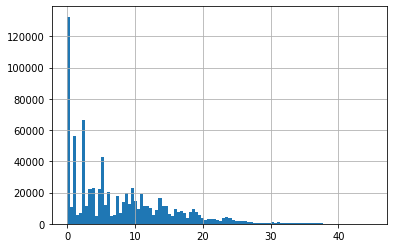

In [564]:
quanguo_np.sum(1).hist(bins=100)

In [565]:
quanguo_np.to_pickle('raw_score_nonpatent_v3.pkl')

### 乘行业系数

In [362]:
quanguo_sector = pd.read_csv(r'D:\Data\完成跑分项目\quanguo\quanguo\full_data\sector_info.csv',
                             usecols=['company_id','seic_lv1'],index_col='company_id')
quanguo_sector_weight = pd.read_csv(r'D:\Data\tech_inno_docker\tech_inno_index\score_assistant\sector_weight.csv',
                                   index_col='sector',usecols=['sector']+np_fi.index.tolist())

In [364]:
quanguo_sector = quanguo_sector.join(quanguo_sector_weight,on='seic_lv1')

In [566]:
quanguo_sector.head()

,seic_lv1,reg_3y_avg,num_trademarks_total,money_q25_sum_weighted,reg_growth_ratio,reg_num,most_recent_time,rounds,reg_capital_formatted,avg_funding_interval,num_members,actual_capital_formatted,num_certificates,num_trademarks_registered,duration,most_recent_money_q25_formatted
company_id,,,,,,,,,,,,,,,,
9A67D6BEA5EEC8F2E84E1608C7428939,其它,0.90,0.90,0.90,0.90,0.90,0.90,0.90,0.90,0.90,0.90,0.90,0.90,0.90,0.90,0.90
262C72169FC82C0C17B7ACDD51D230DA,生物产业,1.05,1.05,1.47,1.05,1.05,1.05,1.47,1.05,1.47,1.05,1.05,1.05,1.05,1.05,1.05
F8EAA80230208C214D04985BB0E0ED89,其它,0.90,0.90,0.90,0.90,0.90,0.90,0.90,0.90,0.90,0.90,0.90,0.90,0.90,0.90,0.90
0FB1D0A875975902F5B83520AAF637C1,新一代信息技术产业,1.05,1.05,1.47,1.47,1.47,1.05,1.47,1.05,1.47,1.05,1.05,1.05,1.05,1.05,1.05
BC268F11BF12EFBB6D3FC9B300C1E585,新一代信息技术产业,1.05,1.05,1.47,1.47,1.47,1.05,1.47,1.05,1.47,1.05,1.05,1.05,1.05,1.05,1.05


In [567]:
quanguo_np[np_fi.index].head()

,num_certificates,reg_num,num_trademarks_total,num_trademarks_registered,money_q25_sum_weighted,avg_funding_interval,rounds,reg_growth_ratio,most_recent_money_q25_formatted,most_recent_time,reg_3y_avg,duration,num_members,actual_capital_formatted,reg_capital_formatted
company_id,,,,,,,,,,,,,,,
9A67D6BEA5EEC8F2E84E1608C7428939,0.000000,0.0,0.000000,0.000000,2.711676,4.552212,3.114439,0.0,0.213483,0.302072,0.0,0.122380,0.357143,0.000000,0.000000
262C72169FC82C0C17B7ACDD51D230DA,13.250086,0.0,1.075001,1.254317,2.111121,1.747095,1.345663,0.0,0.213483,0.183916,0.0,0.357143,0.171518,0.357143,0.357143
F8EAA80230208C214D04985BB0E0ED89,0.000000,0.0,0.000000,0.000000,0.000000,1.747095,1.345663,0.0,0.000000,0.183916,0.0,0.230486,0.238061,0.193306,0.172795
0FB1D0A875975902F5B83520AAF637C1,13.250086,0.0,2.395414,1.254317,2.711676,1.747095,1.345663,0.0,0.357143,0.183916,0.0,0.230486,0.000000,0.193306,0.172795
BC268F11BF12EFBB6D3FC9B300C1E585,8.385451,0.0,2.395414,2.463868,2.111121,3.443449,1.345663,0.0,0.213483,0.357143,0.0,0.000000,0.171518,0.000000,0.357143


In [568]:
quanguo_np[np_fi.index] *= quanguo_sector[np_fi.index] 

In [569]:
quanguo_np.to_pickle('tuned_score_nonpatent_v3.pkl')

In [570]:
quanguo_np.rename(columns=
{'patenting_growth_ratio': '专利增长率',
 'active_inventor_ratio': '活跃发明人规模',
 'invention_stability': '发明专利申请稳定性',
 'self_cited_by_ratio': '专利自引率',
 'apno_cnt': '专利申请数量',
 'non_design_apno_cnt': '非外观专利申请数量',
 'avg_3y_cnt': '近三年平均专利申请数',
 'reg_num': '软件著作权登记总数',
 'reg_3y_avg': '软著平均申请数',
 'reg_growth_ratio': '软著增长率',
 'num_trademarks_total': '商标数量',
 'num_trademarks_registered': '已注册商标数量',
 'joint_application_cnt': '专利联合申请量',
 'joint_applicant_cnt': '联合申请人',
 'num_members': '核心团队人数',
 'avg_technology_score': '平均技术质量',
 'ip_dependency': 'IP依赖',
 'total_patent_award_score': '专利奖',
 'granted_invention_cnt': '有效发明专利总量',
 'granted_invention_ratio': '有效发明专利占比',
 'invention_ratio': '发明专利申请量占比',
 'value_sum': '专利价值总和',
 'value_avg': '专利价值平均值',
 'value_top5_avg': '专利价值最大5个平均值',
 'in_examing_ratio': '审中专利情况',
 'avg_remaining_life_span': '专利预期寿命',
 'avg_cited_by_cnt': '平均被引次数',
 'core_patents_cited_by_cnt': '核心专利被引用次数',
 'core_patents_cited_by_ratio': '核心专利被引用占比',
 'most_cited_patents_value': '被引最多前10项专利的质量',
 'external_licensing_cnt': '专利对外许可数量',
 'top5_current_impact_index': '当前影响力',
 'tech_global_concentration': '专利技术集中度',
 'tech_width': '专利技术广度',
 'country_cnt': '专利地理分布',
 'pct_apno_cnt': 'PCT总量',
 'num_certificates': '资质证书数',
 'rounds': '融资轮数',
 'money_q25_sum_weighted': '融资总金额',
 'most_recent_money_q25_formatted': '最近一次融资金额',
 'most_recent_time': '最近一次融资距今时间',
 'avg_funding_interval': '平均融资间隔时间',
 'reg_capital_formatted': '注册资本',
 'actual_capital_formatted': '实缴资本',
 'duration': '成立时间',
 'public': '上市与否',
 'qualify_certificate': '创新资质',
 'company_name': '企业名称',
 'city': '企业所在城市',
 'district': '企业所在区域',
 'credit_code': '统一社会信用代码',
 'reg_location': '企业注册地址',
 'category': '国民经济行业门类',
 'category_big': '国民经济行业大类',
 'category_middle': '国民经济行业中类',
 'seic_lv1': '战略性新兴产业一层分类',
 'seic_lv2': '战略性新兴产业二层分类',
 'score': '总分'},inplace=True)
quanguo_np.drop('企业名称',axis=1,inplace=True)
quanguo_np.columns =  'np_'+quanguo_np.columns

In [376]:
## 与v2对比

In [571]:
v2_final = pd.read_pickle(r'D:\Data\完成跑分项目\quanguo\v2_quanguo_gaodeLocation_suzhouRank_df_formatted.pkl')

In [573]:
v2_final.columns = ['company_id', '企业名称', '统一社会信用代码', '战略性新兴产业一层分类', '战略性新兴产业二层分类',
       '国民经济行业门类', '国民经济行业大类', '国民经济行业中类', '企业注册地址', '总分_old', '等级', 'p_专利申请数量',
       'p_发明专利申请量占比', 'p_有效发明专利总量', 'p_活跃发明人规模', 'p_联合申请人', 'p_当前影响力', 'p_专利价值最大5个平均值',
       'p_核心专利被引用占比', 'p_专利预期寿命', 'p_专利联合申请量', 'p_专利价值总和', 'p_发明专利申请稳定性', 'p_有效发明专利占比',
       'p_平均被引次数', 'p_核心专利被引用次数', 'p_平均技术质量', 'p_被引最多前10项专利的质量', 'p_专利价值平均值', 'p_审中专利情况',
       'p_近三年平均专利申请数', 'p_专利技术广度', 'p_专利自引率', 'p_专利技术集中度', 'p_非外观专利申请数量', 'p_PCT总量',
       'p_专利对外许可数量', 'p_专利地理分布', 'p_专利增长率', 'p_专利奖', 'p_IP依赖', 'np_资质证书数', 'np_融资总金额',
       'np_软件著作权登记总数', 'np_平均融资间隔时间', 'np_商标数量', 'np_已注册商标数量', 'np_软著增长率', 'np_融资轮数', 'np_核心团队人数',
       'np_实缴资本', 'np_最近一次融资金额', 'np_最近一次融资距今时间', 'np_软著平均申请数', 'np_成立时间', 'np_注册资本', 'o_上市与否',
       'o_创新资质', '企业所在城市', '企业所在区域', '企业所在省份']

In [574]:
v2_final = v2_final.join(quanguo_np,lsuffix='_v2',rsuffix='_v3',on='company_id')

In [575]:
v2_final['专利总分'] = v2_final.loc[:,v2_final.columns.str.startswith('p_')].sum(1)

In [576]:
v2_final['非专利总分_old'] = v2_final.loc[:,v2_final.columns.str.endswith('_v2')].sum(1)

In [577]:
v2_final['非专利总分_new'] = v2_final.loc[:,v2_final.columns.str.endswith('_v3')].sum(1)

In [578]:
v2_final['总分_new'] = v2_final['专利总分']+v2_final['非专利总分_new']+v2_final['o_上市与否']+v2_final['o_创新资质']

In [579]:
v2_final.to_pickle('新旧非专利模型分对比.pkl')

In [580]:
v2_final['rank_old'] = v2_final.总分_old.rank(method='dense',ascending=False)
v2_final['rank_new'] = v2_final.总分_new.rank(method='dense',ascending=False)

In [581]:
v2_final['rank_gap'] = (v2_final.rank_new-v2_final.rank_old).abs()

In [ ]:
v2_final.loc[41438,v2_final.columns[]]

In [582]:
v2_final.sort_values('rank_new')[['企业名称','专利总分','非专利总分_new','非专利总分_old','rank_new','rank_old','总分_new','总分_old']].head(100)

,企业名称,专利总分,非专利总分_new,非专利总分_old,rank_new,rank_old,总分_new,总分_old
2976,奇安信科技集团股份有限公司,46.698780,54.179881,52.161896,1.0,2.0,111.378661,109.360676
41438,京东方科技集团股份有限公司,47.187214,51.077891,54.792098,2.0,1.0,106.665105,110.379312
42857,科大国盾量子技术股份有限公司,46.814458,48.425952,44.560306,3.0,15.0,105.740410,101.874764
50053,山东新北洋信息技术股份有限公司,43.587888,53.651213,52.550181,4.0,9.0,105.639101,104.538069
19732,上海依图网络科技有限公司,44.715172,54.782510,55.163238,5.0,7.0,104.747682,105.128410
27284,北京金山云网络技术有限公司,45.226633,48.901753,48.718583,6.0,10.0,104.628386,104.445216
6731,浙江中控技术股份有限公司,46.583196,52.555957,55.243038,7.0,3.0,104.389154,107.076235
3978,北京旷视科技有限公司,45.689591,53.294066,54.440207,8.0,5.0,104.233658,105.379798
52206,威创集团股份有限公司,44.889415,50.563779,51.815326,9.0,8.0,103.853194,105.104741
55547,深圳市腾讯计算机系统有限公司,47.083596,51.366240,53.186124,10.0,4.0,103.699835,105.519719


In [583]:
v2_final.sort_values('rank_gap',ascending=False)[['企业名称','专利总分','非专利总分_new','非专利总分_old','rank_new','rank_old']].head(100)

,企业名称,专利总分,非专利总分_new,非专利总分_old,rank_new,rank_old
795580,贵州天讯信息产业有限公司,0.000000,5.554451,22.067871,493579.0,154832.0
732150,海口量子网络科技有限公司,0.147067,5.702635,22.219471,488434.0,151730.0
589877,河南迅普环保科技有限公司,0.094793,2.711788,18.033479,526670.0,203846.0
768993,良精集团有限公司,3.425140,1.125000,15.636159,507433.0,190805.0
350844,上海镇宇建筑工程有限公司,0.242472,4.361374,18.671654,506878.0,192752.0
430689,上海广聆环保科技有限公司,0.265997,1.796872,16.831066,533052.0,219107.0
418380,北京中生朗捷生物技术股份有限公司,5.480932,0.345242,14.859294,488799.0,175104.0
382703,杭州鸿辉建筑工程有限公司,4.176491,0.744942,14.981501,502950.0,189608.0
742862,武汉领飞信息系统有限公司,0.000000,5.579148,19.945537,493109.0,179961.0
748667,福建日能达光源科技有限公司,3.378473,0.806511,15.141649,510788.0,198088.0


In [458]:
v2_final.query('企业名称=="北京信威通信技术股份有限公司"')

,company_id,企业名称,统一社会信用代码,战略性新兴产业一层分类,战略性新兴产业二层分类,国民经济行业门类,国民经济行业大类,国民经济行业中类,企业注册地址,总分_old,...,np_软著增长率_v3,np_软著平均申请数_v3,np_核心团队人数_v3,专利总分,非专利总分_old,非专利总分_new,总分_new,rank_old,rank_new,rank_gap
6366,460724AF76583C74F79FF24DFFF8F1FE,北京信威通信技术股份有限公司,91110108600038766W,新一代信息技术产业,,科学研究和技术服务业,科技推广和应用服务业,技术推广服务,北京市海淀区东北旺西路8号中关村软件园7号楼,89.041772,...,2.020842,0.338649,2.567693,41.509693,44.382079,42.035874,86.695567,185.0,226.0,41.0


In [462]:
v2_final.非专利总分_old.describe()

count    804436.000000
mean          5.689684
std           6.956844
min           0.000000
25%           0.234989
50%           2.530472
75%           9.034689
max          55.959040
Name: 非专利总分_old, dtype: float64

In [645]:
v2_final.query('rank_old<=500 and rank_new>500')[['企业名称','专利总分','非专利总分_new','非专利总分_old','rank_new','rank_old']].shape

(109, 6)

In [647]:
v2_final.query('rank_old>500 and rank_new<=500')[['企业名称','专利总分','非专利总分_new','非专利总分_old','rank_new','rank_old']]

,企业名称,专利总分,非专利总分_new,非专利总分_old,rank_new,rank_old
1259,云深互联（北京）科技有限公司,29.405487,53.782691,48.515648,441.0,599.0
1943,福建升腾资讯有限公司,41.534120,44.647399,36.216568,455.0,941.0
2001,武汉明德生物科技股份有限公司,38.602394,41.128548,32.553010,337.0,729.0
2249,广州智光电气股份有限公司,43.468598,37.921762,27.981726,426.0,1079.0
2437,深圳市三旺通信股份有限公司,31.438913,46.831202,36.049269,312.0,918.0
2783,深圳中集智能科技有限公司,43.822500,43.112208,35.836740,399.0,720.0
3036,烟台睿创微纳技术股份有限公司,41.704780,36.873018,29.233563,397.0,752.0
3410,交控科技股份有限公司,43.785010,37.791305,27.824121,266.0,696.0
3501,江苏长电科技股份有限公司,42.967296,42.350257,33.249866,233.0,564.0
3771,上海幻电信息科技有限公司,34.706868,48.435525,42.784887,448.0,625.0


In [643]:
v2_final.query('rank_old<=1000 and rank_new>1000')[['企业名称','专利总分','非专利总分_new','非专利总分_old','rank_new','rank_old']].shape

(168, 6)

In [644]:
v2_final.query('rank_old<=2000 and rank_new>2000')[['企业名称','专利总分','非专利总分_new','非专利总分_old','rank_new','rank_old']].shape

(284, 6)